In [40]:
l = 0.029979245800000
rmsh = 0.5
corl = 3
L = 150
deltax = 0.2

In [41]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
 
def RoughGen(lc, h, rx, ry, dx, dy):
    # 计算N和M
    N = int(np.floor(rx / dx) + 1)
    if N % 2 == 0:
        N += 1
    x = np.arange(-(N - 1) / 2, (N - 1) / 2 + 1) * dx
 
    M = int(np.floor(ry / dy) + 1)
    if M % 2 == 0:
        M += 1
    y = np.arange(-(M - 1) / 2, (M - 1) / 2 + 1) * dy
 
    # 创建网格
    xx, yy = np.meshgrid(x, y)
 
    # 创建频率网格
    kx, ky = np.meshgrid(
        np.concatenate([np.arange(0, (N + 1) / 2) * 2 * np.pi / ry,
                        np.arange((N - 1) / 2 - 1, -1, -1) * 2 * np.pi / ry]),
        np.concatenate([np.arange(0, (M + 1) / 2) * 2 * np.pi / rx,
                        np.arange((M - 1) / 2 - 1, -1, -1) * 2 * np.pi / rx])
    )
 
    # 计算Skl
    # 高斯分布（注释掉）
    Skl = (h**2 * lc**2 / (4 * np.pi)) * np.exp(-(kx**2 + ky**2) * (lc / 2)**2)
    
    # # 指数分布
    # Skl = (h**2 * lc**2 / np.pi**2) / (1 + kx**2 * lc**2) / (1 + ky**2 * lc**2)
    
    Skl = np.sqrt(Skl)
    # 生成随机实数矩阵
    A = np.random.randn(M, N) + np.zeros((M, N),dtype=np.complex64)
    B = np.random.randn(M - 1, N - 1)
    
    # 为A矩阵的一部分添加虚部，构成复数矩阵
    A[1:M, 1:N] += 1j * B * np.pi / np.sqrt(rx * ry)
    
    # A矩阵的第一列和第一行只乘以一半的系数（实数部分）
    A[:, 0] *= np.pi / np.sqrt(rx * ry) / 2
    A[0, 1:] *= np.pi / np.sqrt(rx * ry) / 2
 
    # 进行傅里叶变换
    f = fft.fft2(Skl * A)
    f = 2 * np.real(f)
 
    # 归一化
    kk = np.sqrt(np.sum(f**2) / (N * M))
    zz = ((h / kk) * f).conjugate()
 
    return xx, yy, zz

xx,yy,zz = RoughGen(corl,rmsh,L,L,deltax,deltax)

In [42]:
import scipy.io
fp_data = "D:/Matlab_Projects/RoughGen_MeshNas/MARS/"
xx_data = scipy.io.loadmat(fp_data+"xx.mat")["xx0"]
yy_data = scipy.io.loadmat(fp_data+"yy.mat")["yy0"]
zz_data = scipy.io.loadmat(fp_data+"zz.mat")["zz0"]

In [43]:
from numpy.fft import fft2, ifft2,fftshift,ifftshift
def autocorrelation_2d(_dem):
    _mean_2d = np.nanmean(_dem)
    _Var_2d_1 = np.sum((_dem-_mean_2d) ** 2)
    _pad_size = int(_dem.shape[0] / 2)
    _expanded_ss_2d = np.pad(_dem - _mean_2d, (_pad_size, _pad_size), 'constant')
    _fft_2d = fft2(_expanded_ss_2d)
    _fft_2d_conj = np.conj(_fft_2d)
    _F_prod = _fft_2d * _fft_2d_conj
    _rho_num = fftshift(ifft2(_F_prod)).real
    _autocorrelation_2d = _rho_num[_pad_size:-_pad_size, _pad_size:-_pad_size]/_Var_2d_1
    return _autocorrelation_2d
autocorrelation_2d_mat = autocorrelation_2d(zz_data)

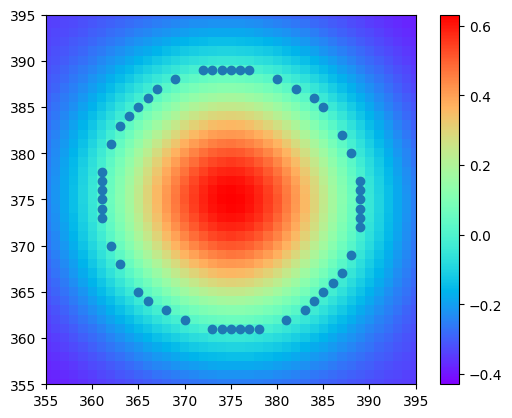

In [44]:
center_index = np.where(autocorrelation_2d_mat == np.max(autocorrelation_2d_mat))
crol_2d = autocorrelation_2d_mat - 1/np.e
# 找到corl_2d接近于零+-0.05的点的位置，用scatter函数画出来
index_crol_2d = np.where(np.abs(crol_2d) < 0.01)

plt.imshow(crol_2d,cmap='rainbow')
plt.colorbar()
plt.scatter(index_crol_2d[1], index_crol_2d[0])
center_offset = 20
plt.xlim(center_index[0]-center_offset,center_index[0]+center_offset)
plt.ylim(center_index[1]-center_offset,center_index[1]+center_offset)
plt.show()

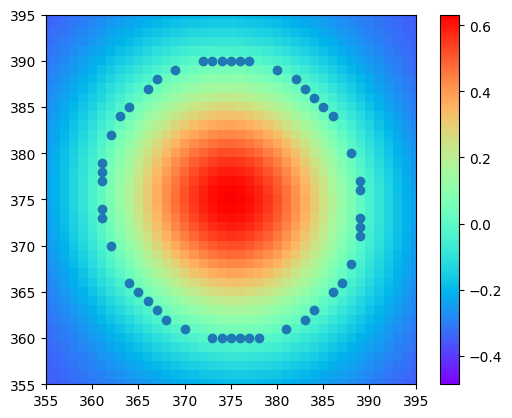

In [45]:
autocorrelation_2d_py = autocorrelation_2d(zz)
center_index = np.where(autocorrelation_2d_py == np.max(autocorrelation_2d_py))
crol_2d = autocorrelation_2d_py - 1/np.e
# 找到corl_2d接近于零+-0.05的点的位置，用scatter函数画出来
index_crol_2d = np.where(np.abs(crol_2d) < 0.01)

plt.imshow(crol_2d,cmap='rainbow')
plt.colorbar()
plt.scatter(index_crol_2d[1], index_crol_2d[0])
center_offset = 20
plt.xlim(center_index[0]-center_offset,center_index[0]+center_offset)
plt.ylim(center_index[1]-center_offset,center_index[1]+center_offset)
plt.show()

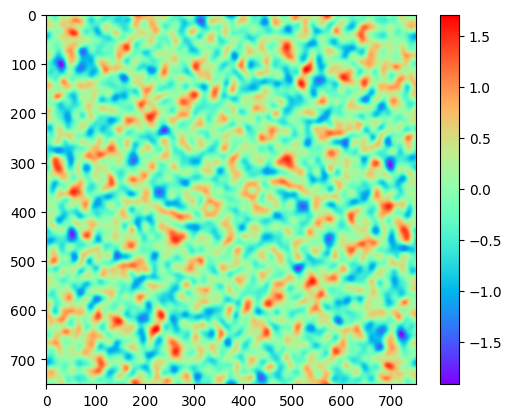

In [46]:
import matplotlib.pyplot as plt

plt.imshow(zz,cmap='rainbow')
plt.colorbar()
plt.show()

[]

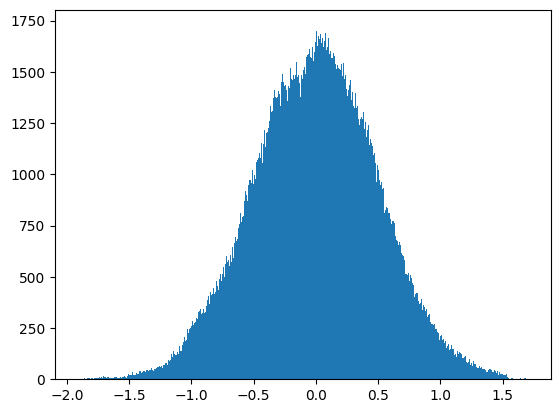

In [48]:

plt.hist(zz.flatten(),bins=1000)
plt.plot()

In [49]:
from numpy.fft import fft2, ifft2,fftshift,ifftshift
def autocorrelation_2d(_dem):
    _mean_2d = np.nanmean(_dem)
    _Var_2d_1 = np.sum((_dem-_mean_2d) ** 2)
    _pad_size = int(_dem.shape[0] / 2)
    _expanded_ss_2d = np.pad(_dem - _mean_2d, (_pad_size, _pad_size), 'constant')
    _fft_2d = fft2(_expanded_ss_2d)
    _fft_2d_conj = np.conj(_fft_2d)
    _F_prod = _fft_2d * _fft_2d_conj
    _rho_num = fftshift(ifft2(_F_prod)).real
    _autocorrelation_2d = _rho_num[_pad_size:-_pad_size, _pad_size:-_pad_size]/_Var_2d_1
    return _autocorrelation_2d
autocorrelation_2d = autocorrelation_2d(zz)

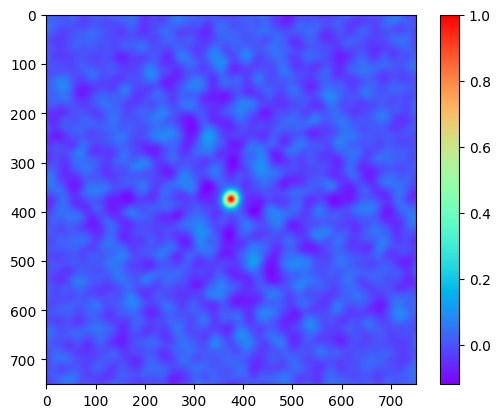

In [50]:

plt.imshow(autocorrelation_2d,cmap='rainbow')
plt.colorbar()

In [51]:
center_index = np.where(autocorrelation_2d == np.max(autocorrelation_2d))

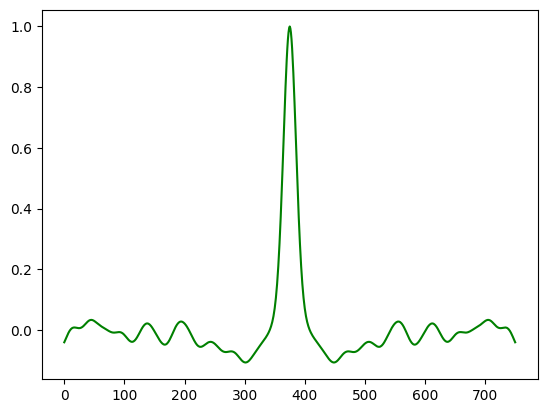

In [52]:

plt.plot(autocorrelation_2d[center_index[0],:],'r')
plt.plot(autocorrelation_2d[:,center_index[1]],'g')
plt.show()

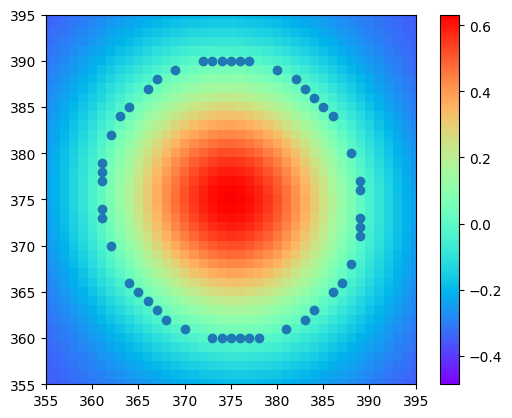

In [53]:
crol_2d = autocorrelation_2d - 1/np.e
# 找到corl_2d接近于零+-0.05的点的位置，用scatter函数画出来
index_crol_2d = np.where(np.abs(crol_2d) < 0.01)

plt.imshow(crol_2d,cmap='rainbow')
plt.colorbar()
plt.scatter(index_crol_2d[1], index_crol_2d[0])
center_offset = 20
plt.xlim(center_index[0]-center_offset,center_index[0]+center_offset)
plt.ylim(center_index[1]-center_offset,center_index[1]+center_offset)
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_30352\1797579125.py:6: RuntimeWarning: invalid value encountered in sqrt
  y_circle = np.sqrt(15**2 - x_circle**2)


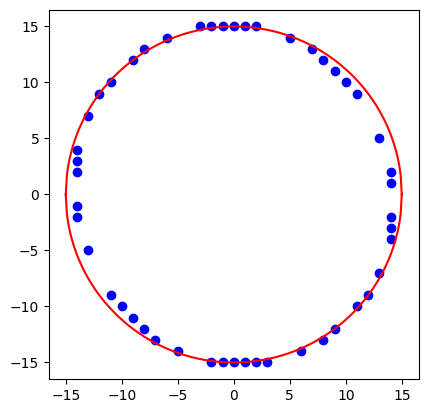

In [68]:
plt.scatter(index_crol_2d[1]-center_index[1] , index_crol_2d[0] - center_index[0],c='b')
# 画一个半径为15的圆，圆心在(0,0)
# 计算圆的x，y坐标
x_circle = np.arange(-15,15+1,0.1)
# x_circle = x_circle + x_circle的对称
y_circle = np.sqrt(15**2 - x_circle**2)
x_circle = np.concatenate([x_circle,x_circle[::-1]])
y_circle = np.concatenate([y_circle,-y_circle[::-1]])
plt.plot(x_circle,y_circle,'r')
plt.axis('equal')
plt.axis("square")
plt.show()
# 画圆